In [598]:
# Opimize a SVR with Newuoa algorihm 
# Import all bibs
import pdfo as pf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.svm import SVR
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics.pairwise import rbf_kernel
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform




In [599]:
# Set 70 datapoints with a testfunction
np.random.seed(1)
n = 70
lower = [-2.5,-1.5]
upper = [1.5,2.5]
x = np.column_stack((np.random.uniform(lower[0], upper[0], n), np.random.uniform(lower[1], upper[1], n)))
f = lambda x: 20 + x[:,0]**2 + x[:,1]**2 - 10*(np.cos(2*np.pi*x[:,0]) + np.cos(2*np.pi*x[:,1]))
y = f(x)

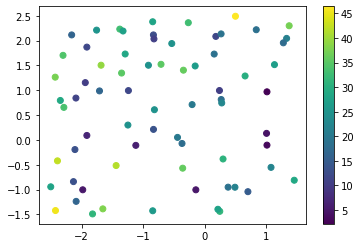

In [600]:

# Create a dataframe with the the datapoints
df = pd.DataFrame({'x.1': x[:, 0], 'x.2': x[:, 1], 'y': y})

# Create a color map using the viridis colorset
cmap = cm.viridis

# Plot the points
plt.scatter(x=df['x.1'], y=df['x.2'], c=df['y'], cmap=cmap)
plt.colorbar()
plt.show()

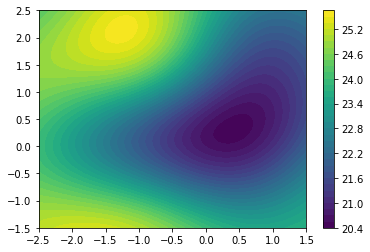

In [601]:
np.random.seed(1)

# Generate a SVR with the datapoints
model = SVR(kernel='rbf', gamma='auto', C=1.0, epsilon=0.1, tol=1e-3)
model.fit(x, y)

nplot_dim = 100

xplot = np.meshgrid(np.linspace(lower[0], upper[0], nplot_dim), 
                    np.linspace(lower[1], upper[1], nplot_dim))
xplot_flat = np.column_stack([xplot[0].ravel(), xplot[1].ravel()])
yplot = model.predict(xplot_flat)

# Plot the SVR
df = pd.DataFrame({'x.1': xplot[0].ravel(), 'x.2': xplot[1].ravel(), 'y': yplot})
cmap = ListedColormap(sns.color_palette("viridis", n_colors=256).as_hex())

plt.contourf(df['x.1'].values.reshape((nplot_dim, nplot_dim)),
             df['x.2'].values.reshape((nplot_dim, nplot_dim)),
             df['y'].values.reshape((nplot_dim, nplot_dim)),
             levels=50,
             cmap=cmap)

plt.colorbar()
plt.show()


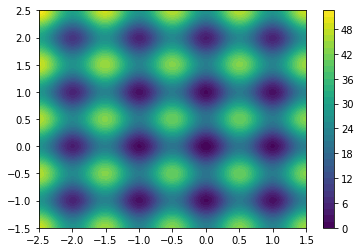

In [602]:
# Plot the testfunction 
yplot2 = f(xplot_flat)
df = pd.DataFrame({'x.1': xplot[0].ravel(), 'x.2': xplot[1].ravel(), 'y': yplot2})
cmap = ListedColormap(sns.color_palette("viridis", n_colors=256).as_hex())

plt.contourf(df['x.1'].values.reshape((nplot_dim, nplot_dim)),
             df['x.2'].values.reshape((nplot_dim, nplot_dim)),
             df['y'].values.reshape((nplot_dim, nplot_dim)),
             levels=50,
             cmap=cmap)

plt.colorbar()
plt.show()


Grid Search

Best hyperparameters: {'C': 29.763514416313193, 'epsilon': 10.0, 'gamma': 'scale', 'tol': 1.0}


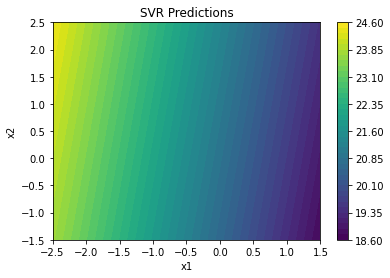

In [603]:

# Define the parameter grid
param_grid = {
    'epsilon': np.logspace(-3, 1, 20),  # Wertebereich von 0.001 bis 10
    'C': np.logspace(-3, 2, 20),  # Wertebereich von 0.001 bis 100
    'gamma': ['scale', 'auto'],
    'tol': np.logspace(-4, 0, 20)  # Wertebereich von 0.0001 bis 1
}

# Create the SVR model
model = SVR(kernel='linear')

# Perform grid search
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',n_jobs=6)
grid_search.fit(x, y)

# Access the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best SVR model
best_model = grid_search.best_estimator_

# Generate data for plotting
nplot_dim = 200
lower = [-2.5, -1.5]
upper = [1.5, 2.5]
xplot = np.meshgrid(np.linspace(lower[0], upper[0], nplot_dim), np.linspace(lower[1], upper[1], nplot_dim))
xplot_flat = np.column_stack([xplot[0].ravel(), xplot[1].ravel()])
yplot = best_model.predict(xplot_flat)

# Plot the SVR predictions
df = pd.DataFrame({'x.1': xplot[0].ravel(), 'x.2': xplot[1].ravel(), 'y': yplot})
cmap = cm.viridis

plt.contourf(df['x.1'].values.reshape((nplot_dim, nplot_dim)),
             df['x.2'].values.reshape((nplot_dim, nplot_dim)),
             df['y'].values.reshape((nplot_dim, nplot_dim)),
             levels=50,
             cmap=cmap)

plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVR Predictions')
plt.show()




In [604]:
# Calculate error value
error = best_model.score(x, y)
mse = mean_squared_error(y, best_model.predict(x))


print("Fehlerwert:", error)
print("Mean squared error:", mse)


Fehlerwert: 0.014071097494765428
Mean squared error: 117.60135326395435
Objektivwert: -12.316759690876843
